## Análisis de Datos: Resumen Análisis Univariante

Ejecuta las celdas:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")

In [2]:


def plot_histo_dens(df, columns, bins=None):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            if bins:
                sns.histplot(df[column], kde=True, ax=axes[i], bins=bins)
            else:
                sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [3]:

def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()


In [4]:

def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


En este noteboook vamos a repasar el proceso seguido y algunos de los resultados obtenidos durante su aplicación a los dos casos de uso que nos sirven de guía. Además te planteo los siguientes pasos y te dejo tres funciones útiles para que puedas analizar visualmente los datos.


### Pasos Seguidos


0. **Establecer objetivos** 
1. **Completar la definición de los datos/Rellenar fichas datasets**
2. **Tipificar los datos**
3. **Priorizar variables** 
4. **Aplicar tendencia central a todas las variables**
5. **Analizar las frecuencias de las variables categóricas**: Gráficos de barras 
6. **Analizar las medidas de posición y los rangos de las variables numéricas**: Graficos de Caja
7. **Analizar las medidas de dispersión de las variables numéricas**
8. **Analizar las distribuciones de las variables numéricas**: Histogramas y funciones estimadas de densidad (combinados)
9. **Analizar las anomalías o outliers**: confrontación de histogramas y gráficos de cajas. Umbrales (2-3 desviaciones estándar, 4.5 en tamaño "bigotes")

En los pasos de análisis con medidas y gráficos (4 a 9) seguimos más o menos un orden:
1. Aplicar las medidas y gráficas a todas las variables pertinentes [En los dos casos de uso no ha habido que limitar porque no son muchas pero imaginate que tienes 1000 variables o columnas, tendrías que aplicar la priorización y o bien programar algún tipo de selector de los datos]
2. Analizar por orden de prioridad (primero las targets, luego las de prioridad 1, etc). Este análisis se centra en ver situaciones inesperadas, extremas, o no ver variación (la calma chicha también es una información). Tomar nota de lo destacado para preguntarlo o para guiar nuestro análisis multivariante. 

En general no esperamos obtener gran cantidad de información a presentar de nuestro análisis univariante (pero eso no quiere decir que no lo vayamos a hacer nunca) y nos servirá más para preparar preguntas nuevas o tratamientos de los datos (categorización de algunas valores numéricos, tratamiento de outliers, etc) para acometer con más éxito la segunda parte.



### Algunas "notas"

 Destacaría:
#### Caso 1. Seguros

- En general las medias y las medianas no son buenos indicadores porque se trata de distribuciones de datos o dispersas o poco simétricas. Es mejor hacer un tratamiento por rangos o categorías.
- La respuesta a marketing es de un 14% afirmativa y un 86% negativa, ¿eso es bueno o malo? De primeras a mí me parece malo -> Buscar referencias en Internet, preguntar dentro de la empresa.
- Hay bastantes categorías que tienen un valor dominante claro (tipo de poliza, tipo de coche, empleo/no empleo, etc), ¿Cómo afecta eso a su relación con el CLV?¿Tenemos nuevos segmentos para apostar (los que tienen menos valores?¿Cómo es su relación con la respuesta a los correos? Tengo claro que este será un punto importante en la segunda parte
- El CLV tiene mucha dispersión, outliers y un pico en la parte baja. Es un dato interesante, además de hacer el análisis tal cual, categorizaré el CLV y haré un tratamiento por segmentos de CLV además del general. 
- La variable income también puedo categorizarla o dividir el análisis en dos a partir de un punto de corte en el Income, que tienen un pico importante al principio.
- Hay tres variables (incluida CLV) con outliers. CLV lo voy a tratar categorizándolos con una etiqueta especial. Tendré que ver qué hacer con los otros dos.
- Puede ser interesante cotejar las características de los clientes que tienen reclamaciones abiertas y los que no.

Fijate que todavía no he colocado números salvo en casos muy claros. ¿Por qué? Porque hasta que no relacione variables no sé cuales son los números relevantes. Esto es más por mi desconocimiento del contexto de los seguros americanos que por otra cosa (no tengo ni idea de si un 37% de coches de cuatro es algo significativo en el sector USA, por ejemplo...)

### Caso 2. Viajes

Dado que no tenemos un objetivo claro salvo "sacarle todo el jugo" en realidad cualquier cosa por ahora es interesante, aunque yo destacaría:
* Parece claro que hay que perfilar todo el análisis dividiendo por compañía y luego comparar.
* Tabarair como empresa con más vuelos, ¿es la que más ingresos tiene? ¿Es la que mas consume? 
* Barcelona como potencial lugar de crecimiento por estar menos atendida que el resto de lugares (Cádiz parece tener potencial)
* Analizar si Bali y Ginebra están satuarados como mercado.
* Comparar ingresos con consumos y ver la relación, ¿hay algún tipo de viaje que sea más beneficioso? (las gráficas de distribución de valores invitan un poco a ello)
* Dado que el A320 es el de menor uso claramente, ¿cómo es su ingreso medio?¿y su consumo? (si el ingreso está por encima por ejemplo, quizá lo estamos infrautilizando)
* Los datos no tienen outliers destacados, no hay que hacer mucho más con ellos.




### Qué me gustaría tener en este punto

Además de las tablas del principio rellenas con sus descripciones, tipos de variables e importancias (quizás ahora rectificadas o reordenadas). Me gustaría tener por cada variable:

* Su tendencia central
* Sus diagramas de barras o histogramas-densidad según el tipo de variable
* Su desviación estándar, diagrama de caja y rangos.
* Detectados los posibles outliers
* Un conjunto de conclusiones o puntos de acción  sobre esa variable.

####  Caso 1. Seguros: Ejemplo medidas y gráficas univariantes

Te muestro un ejemplo para dos de las variables que hemos considerado target o directoras:


##### **CLV** (Customer Lifetime Value)

In [5]:
df_seguros["customer_lifetime_value"].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: customer_lifetime_value, dtype: float64

(2,)


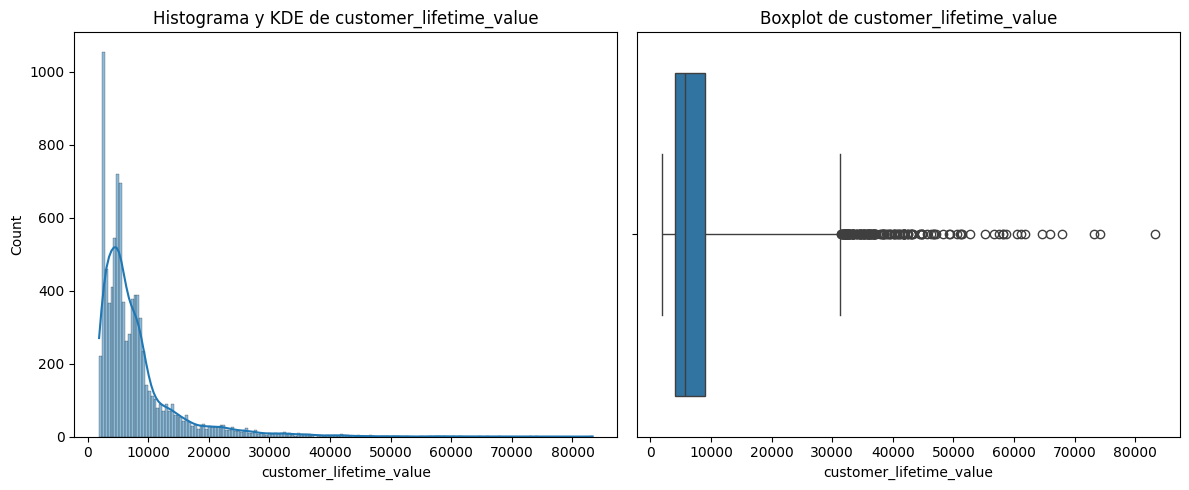

In [6]:
plot_combined_graphs(df_seguros, ["customer_lifetime_value"], whisker_width= 4.5)

Notas: 
- Existen outliers que "dispersan" la muestra, es mejor emplear la median (5780) como representativa frente a la media (8004), si no se excluyen esos outliers.
- A pesar de los anómalos, existe una concentración de valores importantes en la zona baja. Hacer el analisis por segmentos de CLV además de CLV total, así podría tratar también el segmento anómalo.
- Para el segmento anómalo, ver su distribución demográfica, ¿hay un pérfil o perfiles claros?
- Existen valores significativos (en la zona baja), analizar esos clientes y preguntar sobre estos igual que sobre los outliers.

##### **Response** (Respuesta a ofertas de marketing):

Para el caso de las categóricas, me llega con mostrar de primeras su distribución frecuencial y destacar el valor máximo:

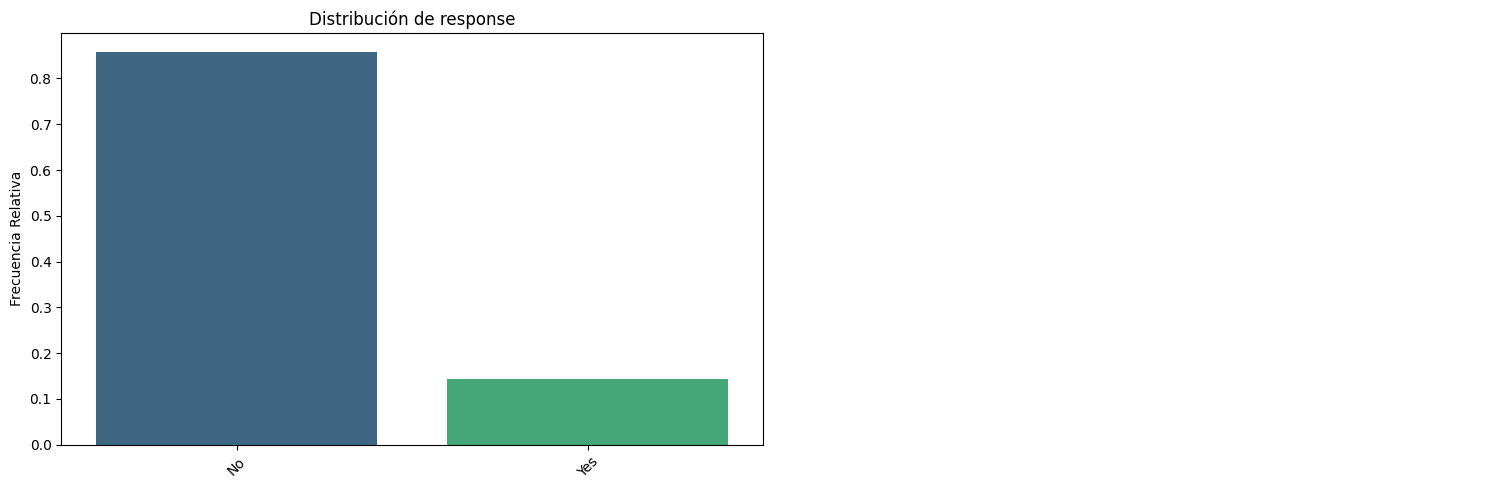

In [7]:
pinta_distribucion_categoricas(df_seguros, ["response"], relativa = True)

Notas:
* Claramente domina la negativa (86%) [aquí marco la moda] frente a la respuresta positiva (16%). ¿Es esto una tendencia normal? Buscar referencias, preguntar dentro de la empresa.
* Habrá que abrir los dos perfiles y compararlos, es claramente una vairable para dirigir el análisis multivariante (es decir ver como varían las otras variables en función de los valores de esta)

Y haría lo mismo para el caso 2. Ojo, y para el resto de todas las variables, si son muchas pues por orden de prioridad hasta que consideremos que hemos dedicado el tiempo suficiente (el estar más cerca de los objetivos nos dará una idea de cuando acabar)

### Próximos pasos

Lo siguiente es coger nuestras preguntas iniciales, nuestras nuevas preguntas y notas y comenzar el análisis multivariante. Para ello en la primera sesión de la siguiente unidad haremos un plan de ataque (la combinatoria de variables puede matarte por AnalysisParalisys) y empezaremos a ver ya resultados que formen parte de lo que será la presentación final.

 ### ANEXO: Funciones Visualización

In [8]:

def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [9]:


def plot_histo_dens(df, columns, bins=None):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            if bins:
                sns.histplot(df[column], kde=True, ax=axes[i], bins=bins)
            else:
                sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Ejemplo de uso:
# plot_histograms_with_density(df, ['columna1', 'columna2', 'columna3'], bins=20)


In [10]:

def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()




In [11]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
